In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to the list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-8.784177076473753 -73.47735338722907
-25.958045612285687 -132.2032096318947
-45.66972538508433 70.99621951315635
-79.42910728944761 162.81272546247118
8.261797451245187 -26.028282127958136
57.3756296487131 127.33370652755212
17.927121241549884 -118.43018858996317
18.49324062148561 173.0832024409316
-54.95763829018481 -66.73595790331801
-73.38481161856078 43.26722921389509
69.45753633586267 139.11209015771692
22.955641980569666 -106.27412871418181
-53.58970878464385 -16.638317196273533
-20.216754919967187 28.458293258292315
-79.88362670264712 -44.13178882732268
-32.22872600898495 22.985358288841866
-31.123426609572846 72.1144579743831
-30.82279673644898 136.7509802471256
-5.630240678705718 108.17879517566172
17.06286106369376 138.41817500869473
-2.194209946125625 3.035276702787712
-28.340749666311318 124.63540998320872
20.957047782907935 -1.3745692082103744
-28.573639979084625 114.6277763862202
-48.46863983651229 -49.33272474965554
15.01371433386025 -142.59819085274518
17.2417461532503

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Starting URL weather map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | porto walter
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | tommot
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | deputatskiy
Processing Record 12 of Set 1 | agua verde
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | bulawayo
Processing Record 15 of Set 1 | willowmore
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | port augusta
Processing Record 18 of Set 1 | indramayu
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | port-gentil
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | tessalit
Processing Rec

Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | west wendover
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | merauke
Processing Record 45 of Set 4 | chipiona
Processing Record 46 of Set 4 | uto
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | hailar
Processing Record 50 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 1 of Set 5 | karamay
City not found. Skipping...
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | sungaipenuh
Processing Record 5 of Set 5 | iquique
Processing Record 6 of Set 5 | kuche
City not found. Skipping...
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | currais novos
Processing Record 9 of Set 5 | kenora
Processing Record 10 of Set 5 | barrow
Processing Record 11 of Set 5 | la ronge
Processing Record 

Processing Record 29 of Set 8 | moron
Processing Record 30 of Set 8 | batagay-alyta
Processing Record 31 of Set 8 | zhigansk
Processing Record 32 of Set 8 | barawe
City not found. Skipping...
Processing Record 33 of Set 8 | phan thiet
Processing Record 34 of Set 8 | kibakwe
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | henties bay
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | prado
Processing Record 39 of Set 8 | ludza
Processing Record 40 of Set 8 | eydhafushi
Processing Record 41 of Set 8 | golden
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | oussouye
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | college
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | behshahr
Processing Record 48 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 49 of Set 8 | riyadh
Processing Record 50 of Set 8 | san lazaro
Processing Record 1 of Set 9 | camana
Processing

Processing Record 18 of Set 12 | zhezkazgan
Processing Record 19 of Set 12 | nicoya
Processing Record 20 of Set 12 | mayo
Processing Record 21 of Set 12 | rudnichnyy
Processing Record 22 of Set 12 | khakurinokhabl
Processing Record 23 of Set 12 | victor harbor
Processing Record 24 of Set 12 | iyo
Processing Record 25 of Set 12 | aflu
City not found. Skipping...
Processing Record 26 of Set 12 | zemio
Processing Record 27 of Set 12 | aitape
Processing Record 28 of Set 12 | uray
Processing Record 29 of Set 12 | korla
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | karachi
Processing Record 32 of Set 12 | sao simao
Processing Record 33 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 34 of Set 12 | tuy hoa
Processing Record 35 of Set 12 | port moresby
Processing Record 36 of Set 12 | tolentino
Processing Record 37 of Set 12 | fengcheng
Processing Record 38 of Set 12 | progreso
Processing Record 39 of Set 12 | flinders
Processing Record 40 of Set 12

In [15]:
len(city_data)

571

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Porto Walter,-8.2686,-72.7439,91.51,44,73,4.81,BR,2023-01-27 15:39:12
1,Rikitea,-23.1203,-134.9692,78.13,77,77,12.95,PF,2023-01-27 15:39:12
2,Souillac,-20.5167,57.5167,79.18,89,75,0.00,MU,2023-01-27 15:39:12
3,Bluff,-46.6000,168.3333,48.27,78,12,3.13,NZ,2023-01-27 15:39:13
4,Sao Filipe,14.8961,-24.4956,75.90,66,61,10.67,CV,2023-01-27 15:39:13
5,Tommot,58.9564,126.2925,-50.98,99,60,1.12,RU,2023-01-27 15:39:13
6,Constitucion,-35.3333,-72.4167,68.79,54,2,15.59,CL,2023-01-27 15:39:14
7,Butaritari,3.0707,172.7902,80.29,79,9,18.28,KI,2023-01-27 15:39:14
8,Ushuaia,-54.8000,-68.3000,47.86,76,75,8.05,AR,2023-01-27 15:39:15
9,Port Alfred,-33.5906,26.8910,77.18,86,25,4.00,ZA,2023-01-27 15:39:15


In [22]:
#new_column_order = ["column1", "column2", "column3", "column5", "column6", "column7", "column8"]
#df = df[new_column_order]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Walter,BR,2023-01-27 15:39:12,-8.2686,-72.7439,91.51,44,73,4.81
1,Rikitea,PF,2023-01-27 15:39:12,-23.1203,-134.9692,78.13,77,77,12.95
2,Souillac,MU,2023-01-27 15:39:12,-20.5167,57.5167,79.18,89,75,0.00
3,Bluff,NZ,2023-01-27 15:39:13,-46.6000,168.3333,48.27,78,12,3.13
4,Sao Filipe,CV,2023-01-27 15:39:13,14.8961,-24.4956,75.90,66,61,10.67
5,Tommot,RU,2023-01-27 15:39:13,58.9564,126.2925,-50.98,99,60,1.12
6,Constitucion,CL,2023-01-27 15:39:14,-35.3333,-72.4167,68.79,54,2,15.59
7,Butaritari,KI,2023-01-27 15:39:14,3.0707,172.7902,80.29,79,9,18.28
8,Ushuaia,AR,2023-01-27 15:39:15,-54.8000,-68.3000,47.86,76,75,8.05
9,Port Alfred,ZA,2023-01-27 15:39:15,-33.5906,26.8910,77.18,86,25,4.00


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

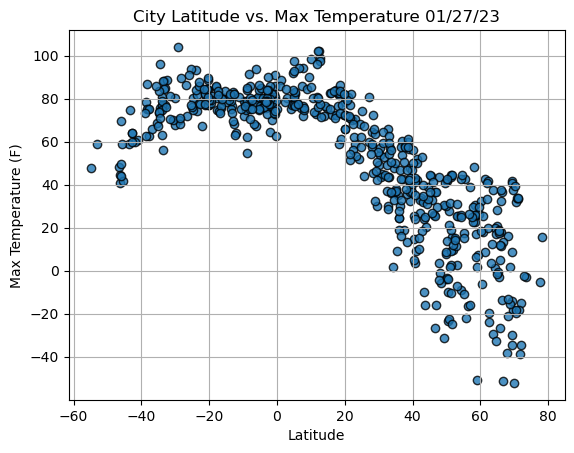

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show Plot.
plt.show()

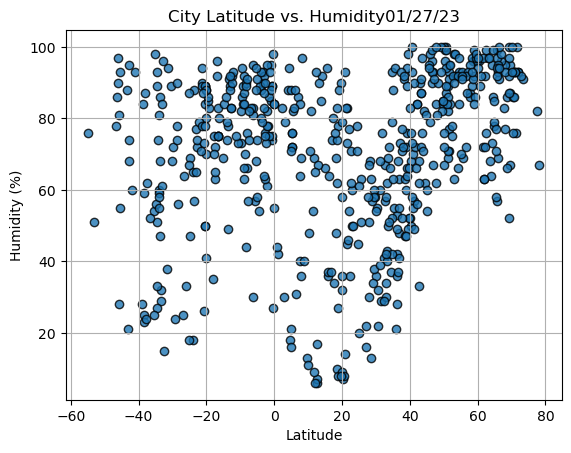

In [34]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show Plot.
plt.show()

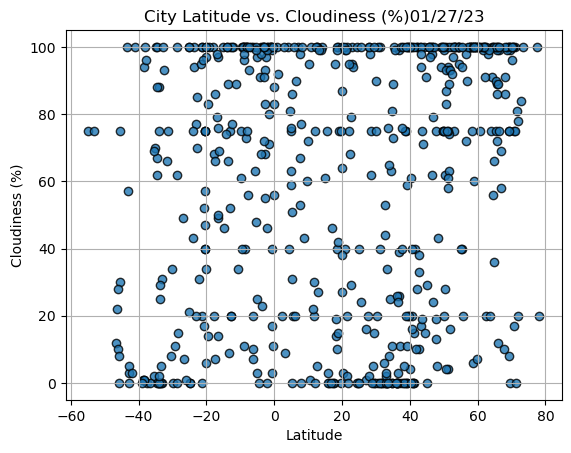

In [35]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show Plot.
plt.show()

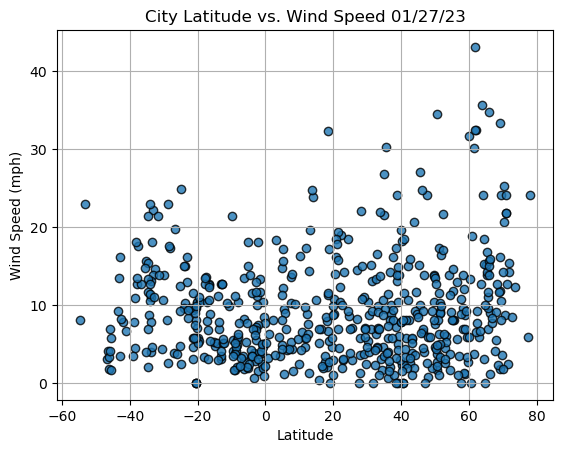

In [36]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(F"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show Plot.
plt.show()